In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\Asus\.conda\envs\nconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
training_set= tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Asus\Desktop\dataset\train',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 3115 files belonging to 36 classes.


In [5]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Asus\Desktop\dataset\validation',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
 image_size=(64, 64),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 351 files belonging to 36 classes.


In [6]:
cnn= tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [7]:
cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                  

In [10]:
training_history= cnn.fit(x=training_set, validation_data=validation_set, epochs=36)


Epoch 1/36


98/98 [==============================] - 378s 4s/step - loss: 22.7603 - accuracy: 0.0292 - val_loss: 3.5437 - val_accuracy: 0.0712
Epoch 2/36
98/98 [==============================] - 371s 4s/step - loss: 3.5543 - accuracy: 0.0491 - val_loss: 3.5327 - val_accuracy: 0.0712
Epoch 3/36
98/98 [==============================] - 376s 4s/step - loss: 3.4050 - accuracy: 0.0966 - val_loss: 3.3987 - val_accuracy: 0.1595
Epoch 4/36
98/98 [==============================] - 376s 4s/step - loss: 3.1343 - accuracy: 0.2006 - val_loss: 3.1040 - val_accuracy: 0.2479
Epoch 5/36
98/98 [==============================] - 379s 4s/step - loss: 2.6923 - accuracy: 0.3233 - val_loss: 2.6343 - val_accuracy: 0.4302
Epoch 6/36
98/98 [==============================] - 366s 4s/step - loss: 2.2196 - accuracy: 0.4549 - val_loss: 2.0830 - val_accuracy: 0.5556
Epoch 7/36
98/98 [==============================] - 371s 4s/step - loss: 1.7900 - accuracy: 0.5753 - val_loss: 1.6818 - val_accuracy: 0.6581
Epoch 8/36

In [8]:
cnn.save('VStrained_model.h5')


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
training_history.history #Return Dictionary Of History


NameError: name 'training_history' is not defined

In [10]:
training_set.class_names


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [14]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [15]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [1]:
print("Validation Set Accuracy: {} %" .format(training_history.history['val_accuracy'][-1]*100))

print("Training Set Accuracy: {} %" .format(training_history.history['accuracy'][-1]*100))

NameError: name 'training_history' is not defined

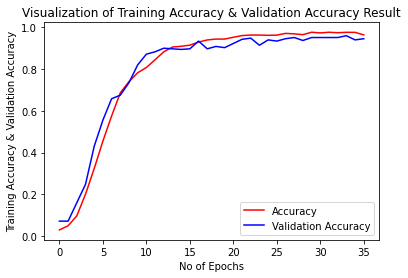

In [17]:
epochs=[i for i in range (1,40)]
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend()
plt.show()

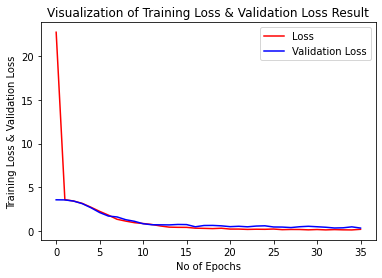

In [18]:
plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend()
plt.show()

In [19]:
loss,accuracy=cnn.evaluate(training_set)

98/98 [==============================] - 80s 775ms/step - loss: 0.0970 - accuracy: 0.9759


In [20]:
val_loss,val_accuracy=cnn.evaluate(validation_set)

11/11 [==============================] - 11s 600ms/step - loss: 0.3033 - accuracy: 0.9459


In [22]:
test_set= tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Asus\Desktop\dataset\test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 359 files belonging to 36 classes.


In [23]:
test_loss,test_accuracy=cnn.evaluate(test_set)

12/12 [==============================] - 12s 578ms/step - loss: 0.2976 - accuracy: 0.9471


In [24]:
test_accuracy*100

94.70751881599426

1/1 [==============================] - 1s 699ms/step
Classification Report:
                precision    recall  f1-score   support

        apple       0.88      0.70      0.78        10
       banana       1.00      0.78      0.88         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.90      1.00      0.95         9
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.90      0.95        10
       carrot       1.00      0.89      0.94         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.89      0.94         9
         corn       0.88      0.70      0.78        10
     cucumber       1.00      1.00      1.00        10
     eggplant       0.91      1.00      0.95        10
       garlic       0.91      1.00      0.95        10
       ginger       0.91      1.00      0.95        10
       grapes       1.00      1.00      1.00         9
     jalepeno       1.00      1.00      1.

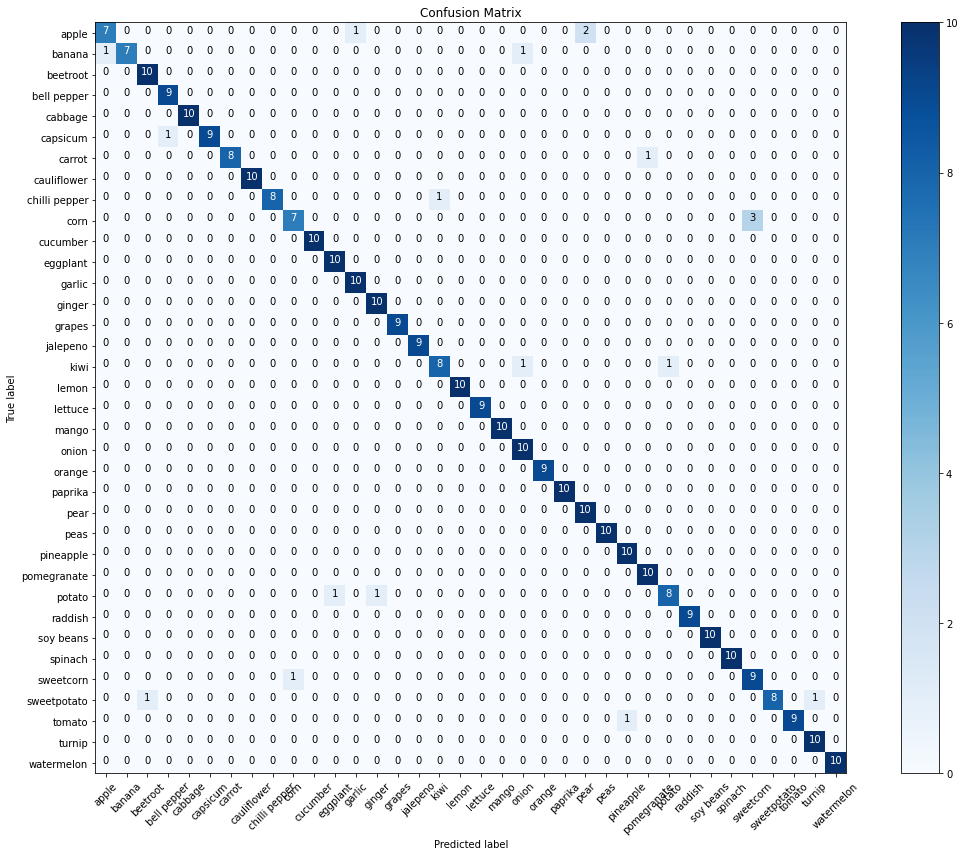

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools


# Load the saved model
loaded_model = tf.keras.models.load_model('VStrained_model.h5')

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation set and make predictions
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = loaded_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Create a classification report
class_names = validation_set.class_names
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(confusion, class_names)
plt.show()

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have your trained CNN model (cnn) and datasets (training_set, validation_set, test_set)

def get_true_labels_and_predictions(model, dataset):
    true_labels = []
    predicted_labels = []
    for images, labels in dataset:
        true_labels.extend(np.argmax(labels.numpy(), axis=1))
        predicted_labels.extend(np.argmax(model.predict(images), axis=1))
    return true_labels, predicted_labels

# Calculate metrics for the training dataset
train_true_labels, train_pred_labels = get_true_labels_and_predictions(cnn, training_set)
train_cm = confusion_matrix(train_true_labels, train_pred_labels)
train_report = classification_report(train_true_labels, train_pred_labels)

# Calculate metrics for the validation dataset
val_true_labels, val_pred_labels = get_true_labels_and_predictions(cnn, validation_set)
val_cm = confusion_matrix(val_true_labels, val_pred_labels)
val_report = classification_report(val_true_labels, val_pred_labels)

# Calculate metrics for the test dataset
test_true_labels, test_pred_labels = get_true_labels_and_predictions(cnn, test_set)
test_cm = confusion_matrix(test_true_labels, test_pred_labels)
test_report = classification_report(test_true_labels, test_pred_labels)

# Print or use the metrics as needed
print("Train Confusion Matrix:")
print(train_cm)
print("Train Classification Report:")
print(train_report)

print("\nValidation Confusion Matrix:")
print(val_cm)
print("Validation Classification Report:")
print(val_report)

print("\nTest Confusion Matrix:")
print(test_cm)
print("Test Classification Report:")
print(test_report)

1/1 [==============================] - 0s 161ms/step
Train Confusion Matrix:
[[66  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 91  0  0]
 [ 0  0  0 ...  0 95  0]
 [ 0  0  0 ...  0  0 81]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.99      0.99      0.99        75
           2       1.00      1.00      1.00        88
           3       0.98      0.96      0.97        90
           4       1.00      0.97      0.98        92
           5       0.98      0.98      0.98        89
           6       1.00      0.93      0.96        82
           7       1.00      1.00      1.00        79
           8       0.98      0.98      0.98        87
           9       0.93      0.92      0.92        87
          10       1.00      0.98      0.99        94
          11       1.00      1.00      1.00        84
          12       0.74      1.00  

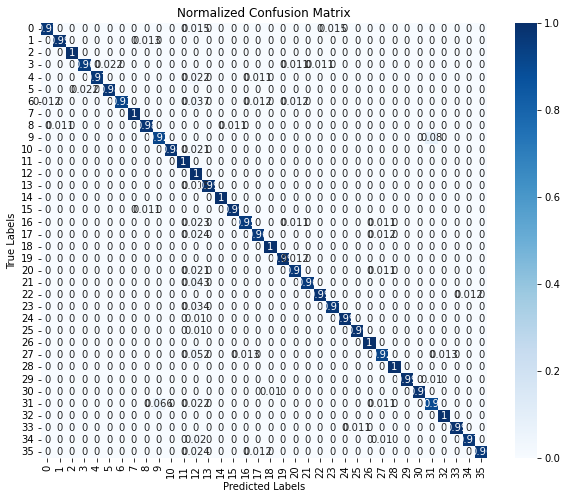

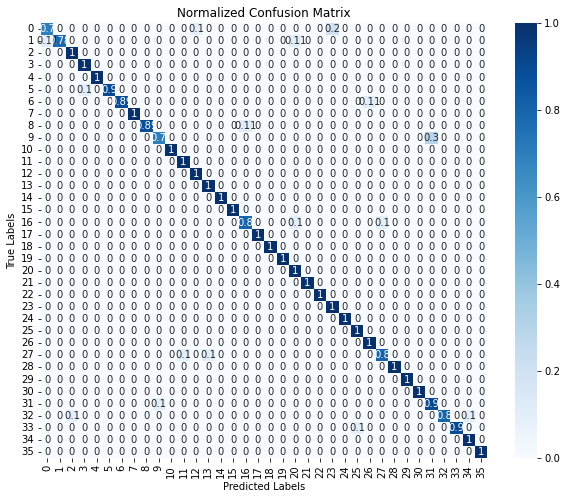

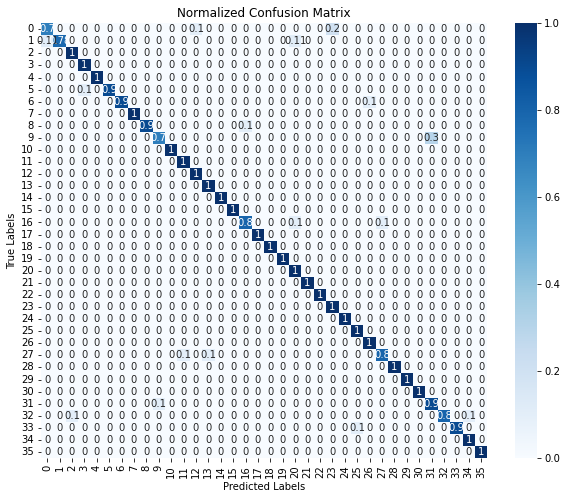

In [27]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ... (your existing code for loading datasets and defining the CNN model) ...

def normalize_confusion_matrix(cm):
    # Normalize each row of the confusion matrix to sum up to 1
    row_sums = cm.sum(axis=1)
    normalized_cm = cm / row_sums[:, np.newaxis]
    return normalized_cm

# ... (your existing code for getting true labels and predictions and calculating metrics) ...

# Normalize confusion matrices
train_cm_normalized = normalize_confusion_matrix(train_cm)
val_cm_normalized = normalize_confusion_matrix(val_cm)
test_cm_normalized = normalize_confusion_matrix(test_cm)

# Function to plot the normalized confusion matrix
def plot_normalized_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Get class names
class_names = sorted(set(train_true_labels + val_true_labels + test_true_labels))

# Plot normalized confusion matrices for all datasets
plot_normalized_confusion_matrix(train_cm_normalized, class_names)
plot_normalized_confusion_matrix(val_cm_normalized, class_names)
plot_normalized_confusion_matrix(test_cm_normalized, class_names)

1/1 [==============================] - 1s 567ms/step


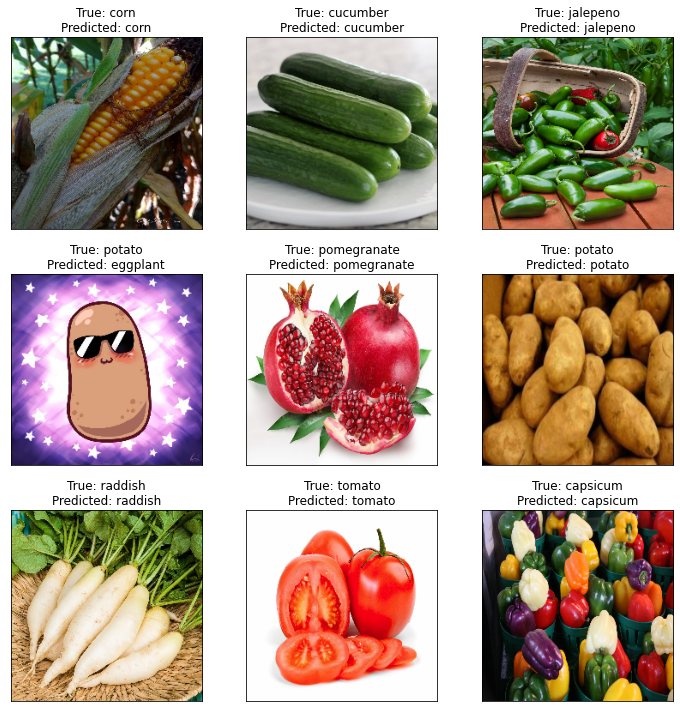

In [28]:
import matplotlib.pyplot as plt

# Assuming you have your CNN model (cnn) and test dataset (test_set)
# The 'pred' variable is already defined with the predicted labels

# Retrieve a few test samples and their corresponding true labels
num_samples_to_display = 9
sample_images, sample_labels = next(iter(test_set.take(num_samples_to_display)))

# Get the corresponding class names from the test_set
class_names = test_set.class_names

# Make predictions on the sampled images
sample_predictions = cnn.predict(sample_images)
sample_predictions = np.argmax(sample_predictions, axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].numpy().astype(np.uint8))
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[sample_predictions[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()

In [58]:
test_set = tf.keras.utils.image_dataset_from_directory(
      r'C:\Users\Asus\Desktop\dataset\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [61]:
cnn = tf.keras.models.load_model('VStrained_model.h5')


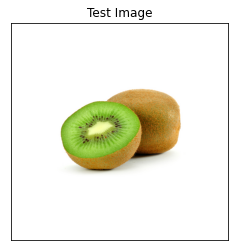

In [66]:
#Test Image Visualization
import cv2
image_path = r'C:\Users\Asus\Desktop\dataset\test\kiwi\Image_1.jpg'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

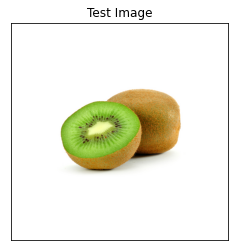

1/1 [==============================] - 0s 144ms/step
Predictions: [[1.9876019e-08 3.2634971e-06 3.1227260e-10 1.1241249e-09 1.1213854e-10
  4.0073025e-11 4.3572052e-07 1.2212638e-10 1.0964060e-09 9.1049381e-09
  2.1626330e-09 2.8318936e-09 1.1098900e-07 2.7240290e-09 2.8327507e-10
  6.4269023e-10 9.9999356e-01 1.4420896e-09 3.3148147e-11 3.2574179e-10
  4.0371518e-08 4.0316706e-09 2.5195682e-10 2.8623376e-08 8.8016825e-12
  2.4759467e-08 1.9239066e-10 2.2932016e-09 1.7576945e-10 7.6692555e-11
  1.9543528e-10 2.4190856e-06 8.1351770e-09 1.3906158e-07 3.1275371e-09
  6.8558055e-11]]


In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the pre-trained model
cnn = tf.keras.models.load_model('VStrained_model.h5')

# Test Image Visualization
image_path = r'C:\Users\Asus\Desktop\dataset\test\kiwi\Image_1.jpg'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Load and preprocess the test image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

# Make predictions
predictions = cnn.predict(input_arr)

# Display predictions or perform further processing as needed
print("Predictions:", predictions)


In [69]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

16


In [2]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

NameError: name 'test_set' is not defined

In [12]:
import os

model_path = r'C:\Users\Asus\Desktop\dataset\VStrained_model.h5'
if os.path.exists(model_path):
    cnn = tf.keras.models.load_model(model_path)
else:
    print(f"Model file not found at {model_path}")